torch.Size([3740, 3, 256, 256])


<Axes: >

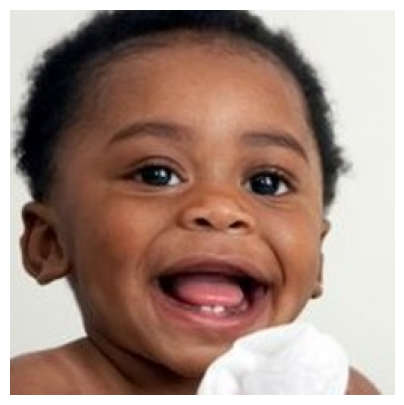

In [73]:
from fastai.vision.all import *
from PIL import Image, UnidentifiedImageError
import torch
from torchvision.transforms import ToTensor

path = Path('./archive/dataset/Happy')
assert path.exists(), f"Path {path} does not exist"

image_files = sorted(get_image_files(path))

tensors = []
to_tensor = ToTensor()

for img_path in image_files:
    try:
        img = Image.open(img_path).convert('RGB')
        img = img.resize((256, 256))
        tensor_img = to_tensor(img)
        tensors.append(tensor_img)
    except (OSError, UnidentifiedImageError) as e:
        print(f"Skipping corrupted image: {img_path} - {e}")

batch_tensor = torch.stack(tensors)
print(batch_tensor.shape)

show_image(batch_tensor[1])

<Axes: >

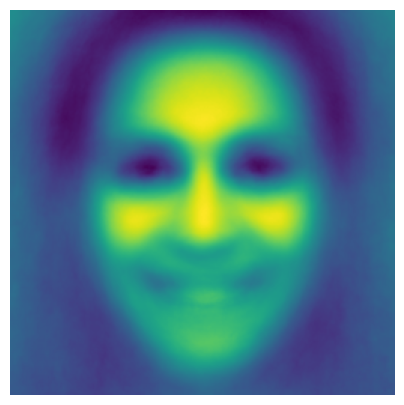

In [74]:
# avg_pixels = batch_tensor.mean(dim=1)
# show_image(avg_pixels[3])

avg_first_10 = batch_tensor[:1100].mean(dim=1).mean(dim=0)
show_image(avg_first_10)